**Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
column_names =['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
bos1=pd.read_csv('housing.csv',delimiter=r"\s+",names=column_names)
bos1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
bos1.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Spitting model data with 70% for training**

In [ ]:
from sklearn.model_selection import train_test_split
X=np.array(bos1.iloc[:,0:13])
Y=np.array(bos1["MEDV"])
#testing data size is of 30% of entire data
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size=0.30,random_state=5)

**Using Linear REgression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#load our first model
lr=LinearRegression()
#train the model on training data
lr.fit(x_train,y_train)
#predict the testing data so that we can laer evaluate the model
pred_lr=lr.predict(x_test)

**Model** **Evaluation**

In [ ]:
#error for linear regression with mse=mean_squared_error
mse_lr=sklearn.metrics.mean_squared_error(y_test,pred_lr,squared=False)
print("error for linear Regression={}".format(mse_lr))

error for linear Regression=5.540490745781336


**Naive BAyes Algorithm**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
salary_train=pd.read_csv("SalaryData_Train.csv")
salary_test=pd.read_csv("SalaryData_Test.csv")
string_columns=["workclass", "education","maritalstatus", "occupation","relationship","race","sex","native"]
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Using a Label Encoder- Categorical to numerical**

In [ ]:
from sklearn import preprocessing
number=preprocessing.LabelEncoder()
for i in string_columns:
  salary_train[i]=number.fit_transform(salary_train[i])
  salary_test[i]=number.fit_transform(salary_test[i])

**Assign the encoded variables for training and testing**

In [ ]:
colnames = salary_train.columns
len(colnames[0:13])
trainX=salary_train[colnames[0:13]]
trainY=salary_train[colnames[13]]
testX=salary_test[colnames[0:13]]
testY=salary_test[colnames[13]]

**Gaussian Naive Bayes classifier for model fitting**

**Gaussian naive bayes is use here because data is continous**

In [ ]:
sgnb=GaussianNB()

**Predictions for test data**

In [ ]:
spred_gnb=sgnb.fit(trainX,trainY).predict(testX)

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm_gnb=confusion_matrix(testY,spred_gnb)
print(cm_gnb)
print("Accuracy", (10759+1209)/(10759+601+2491+1209))

[[10759   601]
 [ 2491  1209]]
Accuracy 0.7946879150066402


**KNN Algorithm**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
column_names =['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
bos1=pd.read_csv('housing.csv',delimiter=r"\s+",names=column_names)
bos1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Preprocessing the data:Removing NaN values**

In [ ]:
bos1.isna().sum()

**Splitting model data with 70% for training**

In [ ]:
from sklearn.model_selection import train_test_split
X=np.array(bos1.iloc[:,0:13])
Y=np.array(bos1["MEDV"])
#testing data size is of 30% of entire data
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size=0.30,random_state=5)

**Using KNN Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#train the model on training data
lr=LinearRegression()
lr.fit(x_train,y_train)
#load the KNN Model
Nn=KNeighborsRegressor(3)
Nn.fit(x_train,y_train)
pred_Nn=Nn.predict(x_test)

**Hyperparameter Tuning**

In [ ]:
import sklearn
for i in range(1,50):
  model=KNeighborsRegressor(i)
  model.fit(x_train,y_train)
  pred_y=model.predict(x_test)
  mse=sklearn.metrics.mean_squared_error(y_test,pred_y,squared=False)
  print("{}error for k={}".format(mse,i))

7.97154478854566error for k=1
7.159484875618533error for k=2
7.014927171138291error for k=3
7.004019640065342error for k=4
7.036131375752027error for k=5
7.103650686103268error for k=6
7.249246229196143error for k=7
7.278466403768686error for k=8
7.490296733721186error for k=9
7.573928228851226error for k=10
7.580880154071545error for k=11
7.620709624858009error for k=12
7.702433441773159error for k=13
7.745706188130712error for k=14
7.855546909761407error for k=15
7.970845764140948error for k=16
8.00708692880329error for k=17
8.05951400020052error for k=18
8.105972848197592error for k=19
8.171623447622684error for k=20
8.208766061680672error for k=21
8.266010100575647error for k=22
8.280897264278922error for k=23
8.326448746059764error for k=24
8.38105978099617error for k=25
8.410954693047014error for k=26
8.478704509976565error for k=27
8.50999986845734error for k=28
8.538275555508479error for k=29
8.57421797961705error for k=30
8.599468444172452error for k=31
8.616512206922689error 

**Model Evaluation**

In [ ]:
#Error for KNN Algorithm
mse_Nn=sklearn.metrics.mean_squared_error(y_test,pred_Nn,squared=False)
print("error for k-NN={}".format(mse_Nn))

error for k-NN=7.014927171138291


**Support Vector Machine (SVM)**

In [1]:
#importing  all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Importing the dataset**

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Filtering out columns to retain age and salary columns**

In [6]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

**Data split for training and testing(75/25)**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Scaling using Standard Scaler for Normal Distribution**

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

**Building the model using RBF Kernel**

In [9]:
from sklearn.svm import SVC
classifier_rbf=SVC (kernel ='rbf',random_state= 0)
classifier_rbf.fit(X_train,y_train)
y_pred_rbf= classifier_rbf.predict(X_test)

**Printing the Confusion matrix**

In [10]:
from sklearn.metrics import confusion_matrix
cm_rbf=confusion_matrix(y_test,y_pred_rbf)
print(cm_rbf)

[[64  4]
 [ 3 29]]


**Classification Report**

In [11]:
from sklearn.metrics import classification_report
class_report_rbf=classification_report(y_test,y_pred_rbf)
print(class_report_rbf)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



**Random Forest Algorithm**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Salaries.csv")
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
X=df.iloc[:,1:2].values
y=df.iloc[:,2].values

**Model fitting with 10 trees**

In [16]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

**Prediction of salary with level>6.5**

In [17]:
y_pred=model.predict([[6.5]])

**Visualization of the result**

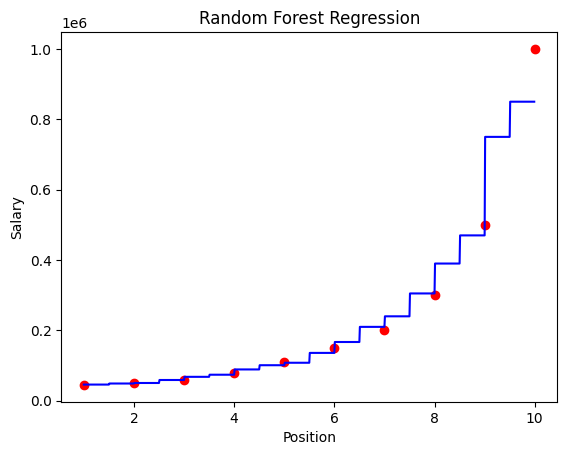

In [18]:
X_grid_data=np.arange(min(X),max(X),0.01)
X_grid_data= X_grid_data.reshape((len(X_grid_data), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid_data, model.predict(X_grid_data), color ='blue')
plt.title('Random Forest Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()